## Predict the orbit of James Webb space telescope with a quantum algorithm - Herman Kolden
### Task 2: Make a quantum circuit to prepare the input state

Team members:
* Felix Cahyadi
* Luis Reyna
* Mohammed Amlieh
* Göksun Beren Usta
* Abhipsa Acharya
* Akshat Srivastava

General idea: To prepare the input states, first we apply Hadamard gate to the qubits to get an equal superposition state. We represent the coordinates of each satellite with two amplitudes and we set them to the desired state by using rotation. We use X gates between U gates to change the states U gate is applied to so that it is not applied more than once to the same state.

### Import Libraries

In [2]:
import numpy as np
import math
from qiskit import *
from qiskit.circuit.gate import Gate
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import U3Gate

### Functions

In [3]:
# Function that does the normalization of the coordinates
def unit_vector(coordinates):
    '''
    coordinates: list of coordinates without normalization
    returns: list of coordinates with normalization
    '''
    constant = np.linalg.norm(np.array(coordinates))
    
    for i in range(len(coordinates)):
        coordinates[i]=(1/constant)*coordinates[i]
        
    return coordinates

# Function that sets random coordinates for n satellites
def n_coordinates(n):
    '''
    n: number of satellites
    returns: list of coordinates
    '''
    coordinates = []
    
    for i in range(n):
        x_1 = ((-1)**(np.random.randint(1,3)))*np.random.rand()
        y_1 = ((-1)**(np.random.randint(1,3)))*(np.sqrt(1-x_1**2))
        coordinates.append(x_1)
        coordinates.append(y_1)
        
    return coordinates

# Function that sets the angles of coordinates
def n_angles(coord):
    '''
    coord: list of coordinates
    returns: list of angles
    '''
    angles = []
    
    for i in range(int(len(coord)/2)):
        theta = (np.arctan2(coord[2*i+1],coord[2*i])-(np.pi/4))*2
        angles.append(theta)
    
    return angles 

### Setting Coordinates and Corresponding Angles
We will set coordinates and angles for two different cases which are when we have 1 satellite and when we have 8 satellites so that we can see how the circuit develops.

In [16]:
# Setting coordinates and angles for 1 satellite by calling related functions we defined above
coordinates1 = n_coordinates(1)
angles1 = [(np.arctan2(coordinates1[1],coordinates1[0]))*2]

print("The coordinates are: ",coordinates1)
print("The angles are: ", angles1)

The coordinates are:  [0.5889275152627096, -0.8081858584301578]
The angles are:  [-1.8821303120022823]


In [5]:
# Setting coordinates and angles for 8 satellites by calling related functions we defined above
coordinates = n_coordinates(8)
angles = n_angles(coordinates)

print("The coordinates are: ",coordinates)
print("The angles are: ", angles)

The coordinates are:  [-0.6408712206201064, 0.767648408179744, -0.5202407632399697, -0.8540196416145789, -0.6620027782842497, -0.7495013819493161, 0.32499683793056633, -0.9457151026261202, -0.6286510691761408, 0.7776874907208519, 0.5651122886276367, -0.8250140006339496, -0.11337306750386877, -0.9935524885806302, 0.6500720853049191, -0.7598725445147455]
The angles are:  [2.9620616270627087, -5.806654668746427, -6.159364511611946, -4.050372211360068, 2.9304312307394094, -3.51125027567513, -4.9396236917638925, -3.2970303846426123]


### Construct the Circuit

#### Circuit for 1 satellite
When we have one satellite, we have two coordinates. Therefore, we will need 1 qubit and use its amplitudes to represent those coordinates.

In [18]:
# Create registers for 1 qubit
q_reg1 = QuantumRegister(1)
c_reg1 = ClassicalRegister(1)
circuit1 = QuantumCircuit(q_reg1,c_reg1)
# Apply U gate to rotate the qubit
circuit1.u(angles1[0],0,0,0)
#circuit.x(q_reg[1])

op1 = qi.Operator(circuit1)
print(np.real(op1.data))

[[ 0.58892752  0.80818586]
 [-0.80818586  0.58892752]]


In [20]:
unit_v1 = unit_vector(coordinates1)
backend = Aer.get_backend('statevector_simulator')
output1 = np.real(qi.Statevector.from_instruction(circuit1).data)

print("Expected: ", np.round(unit_v1,8))
print("State that's generated: ",output1)

Expected:  [ 0.58892752 -0.80818586]
State that's generated:  [ 0.58892752 -0.80818586]


#### Circuit for 8 satellites
When we have eight satellites, we have sixteen coordinates. Therefore, we will need 4 qubits and use their amplitudes to represent those coordinates.

In [8]:
# Create controlled-U gates that will rotate the qubits by angle theta
CCU_ = [U3Gate(theta,0,0).control(3) for theta in angles]

# Create registers for 4 qubits
q_reg = QuantumRegister(4)
c_reg = ClassicalRegister(4)
circuit = QuantumCircuit(q_reg,c_reg)

# Apply Hadamard to get the qubits in an equal superposition state
circuit.h(q_reg)
# Controlled U gate generated using x_1 and y_1
circuit.append(CCU_[0],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
# We apply X gate so that we can apply U gate to different amplitudes
circuit.x(q_reg[1])
# Controlled U gate generated using x_2 and y_2
circuit.append(CCU_[1],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[2])
circuit.x(q_reg[1])
# Controlled U gate generated using x_3 and y_3
circuit.append(CCU_[2],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[1])
# Controlled U gate generated using x_4 and y_4
circuit.append(CCU_[3],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[1])
circuit.x(q_reg[2])
circuit.x(q_reg[3])
# Controlled U gate generated using x_5 and y_5
circuit.append(CCU_[4],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[1])
# Controlled U gate generated using x_6 and y_6
circuit.append(CCU_[5],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[1])
circuit.x(q_reg[2])
# Controlled U gate generated using x_7 and y_7
circuit.append(CCU_[6],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])
circuit.x(q_reg[1])
# Controlled U gate generated using x_8 and y_8
circuit.append(CCU_[7],[q_reg[3],q_reg[2],q_reg[1],q_reg[0]])

op = qi.Operator(circuit)
np.real(op.data)

array([[-0.22658219,  0.2714047 ,  0.22658219, -0.2714047 ,  0.22658219,
        -0.2714047 , -0.22658219,  0.2714047 ,  0.22658219, -0.2714047 ,
        -0.22658219,  0.2714047 , -0.22658219,  0.2714047 ,  0.22658219,
        -0.2714047 ],
       [ 0.2714047 ,  0.22658219, -0.2714047 , -0.22658219, -0.2714047 ,
        -0.22658219,  0.2714047 ,  0.22658219, -0.2714047 , -0.22658219,
         0.2714047 ,  0.22658219,  0.2714047 ,  0.22658219, -0.2714047 ,
        -0.22658219],
       [-0.18393289, -0.30194154, -0.18393289, -0.30194154,  0.18393289,
         0.30194154,  0.18393289,  0.30194154,  0.18393289,  0.30194154,
         0.18393289,  0.30194154, -0.18393289, -0.30194154, -0.18393289,
        -0.30194154],
       [-0.30194154,  0.18393289, -0.30194154,  0.18393289,  0.30194154,
        -0.18393289,  0.30194154, -0.18393289,  0.30194154, -0.18393289,
         0.30194154, -0.18393289, -0.30194154,  0.18393289, -0.30194154,
         0.18393289],
       [-0.23405333, -0.26498875,  0

### Comparing the Expected Outputs and the Outputs of the Circuit

In [9]:
unit_v = np.round(unit_vector(coordinates),8)
# Use the statevector_simulator as our backend
backend = Aer.get_backend('statevector_simulator')
# Get the real part of the amplitudes
output = np.real(qi.Statevector.from_instruction(circuit).data)

print("Expected: ",unit_v)
print(" ")
print(" ")
print("Output: ",output)
print(" ")

Expected:  [-0.22658219  0.2714047  -0.18393289 -0.30194154 -0.23405333 -0.26498875
  0.11490373 -0.33436078 -0.22226172  0.27495405  0.19979737 -0.2916865
 -0.04008343 -0.35127385  0.22983519 -0.26865551]
 
 
Output:  [-0.22658219  0.2714047  -0.18393289 -0.30194154 -0.23405333 -0.26498875
  0.11490373 -0.33436078 -0.22226172  0.27495405  0.19979737 -0.2916865
 -0.04008343 -0.35127385  0.22983519 -0.26865551]
 


### Visualizing the Circuit

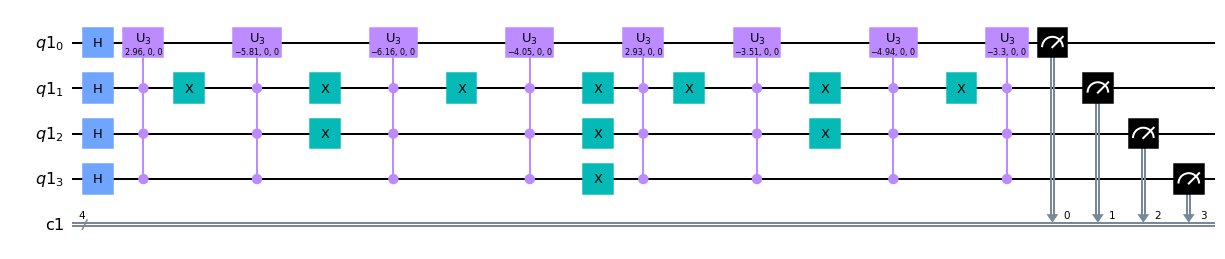

In [10]:
circuit.measure(q_reg,c_reg)
circuit.draw(output="mpl")

### Remarks:

$N = \text{Number of qubits}$

$n = \text{Number of bodies}$

1. #### number of qubits = number of $H$ gates
2. #### number of satellites = number of $U$ gates
3. #### number of qubits increases if $2n$ > $2^N$
4. #### number of $X$ gates between each $U$ gate is limited to the number of qubits


### Simulation Result

{'1011': 8438, '0001': 7463, '1001': 7612, '1000': 4917, '0000': 5139, '0011': 9063, '1101': 12254, '1110': 5350, '0101': 6994, '0010': 3433, '0111': 11251, '0100': 5448, '1111': 7178, '0110': 1381, '1010': 3927, '1100': 152}


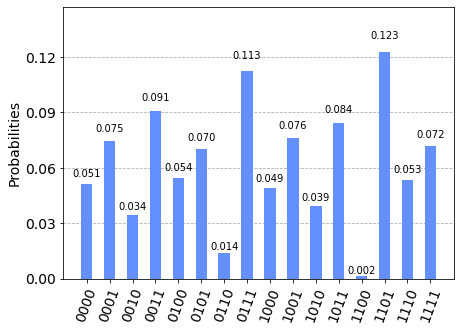

In [11]:
# Use the statevector_simulator as our backend
backend = Aer.get_backend('statevector_simulator')
# Execute the circuit for 100000 times
job = execute(circuit, backend=backend, shots=100000, memory=True)
job_result = job.result()
# Get the histogram data of the experiment
counts = job_result.get_counts(circuit)

print(counts)
plot_histogram(counts)

### Pseudocode for $n$ Satellites

In [ ]:
"""
This program builds a circuit that prepares quantum states.
It is assumed the number of qubits, n, is greater than 1.
The first three functions are given above, they are included
here to present all the functions that would be used to create a
program that generates a general circuit.

############## Given above #################
def unit_vector(coordinates):
    
    Normalizes the classical state

    return coordinates as unit vector

def n_coordinates(n):
    
    Generates a random set of coordinates
        
    return list of coordinates

def n_angles(list of coordinates):
    
    Uses the set of coordinates to
    generate n angles
    
    return list of angles 
    
##############################################

function4(n):

    Creates all the controlled U gates
    using U3Gate(theta,phi,psi), only theta is nonzero
    
    return list of gates

function5(n):

    Creates a circuit with n qubits.
    The circuit has both classical and
    quantum registers.
    
    Apply H to every qubit
    
    return circuit
    
function6(n):

    Determnines the structure of the X gates;
    number of X gates, order of sequence,
    and their vertical positions.
    
    The key here is to use a binary representation
    of the X gates and perform mod 2 operations. These two
    ideas are used to permute amplitudes nonrandomly.
    
    States move in pairs and the final state will
    have structure that is similar to the initial state.
    Thus, it is possible to define the condition that 
    must be met to find the combination of X gates
    that is needed.
    
    return [num of X gates, binary representation] -> the entries of the output can be lists or tuples
    
    

function7(circuit,list of CU gates):

    n = len(list of CU gates)
    x_gates = function6(n)
    
    while n>0:
    
        Apply controlled gate i; the first qubit, from top to bottom,
        is always the target.
        
        Apply X gates, x_gates contains the structure of the X gates
        
        decrement n
        
    return circuit
        
After the final circuit is generated, the final state
can be measured and the circuit can be drawn.

    
    
"""